# Import libraries

In [258]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [259]:
training_data_folder_path = 'dataset/training-data'
test_data_folder_path = 'dataset/test-data'

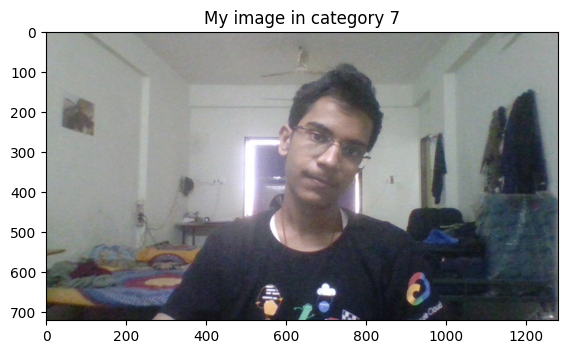

In [260]:
random_image = cv2.imread(
    'dataset/training-data/7/WIN_20220407_14_30_10_Pro.jpg')
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('My image in category 7')
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
plt.show()

In [261]:
haarcascade_frontalface = 'opencv_xml_files/haarcascade_frontalface.xml'

# face detection

In [262]:
def detect_face(input_img):
    image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(haarcascade_frontalface)
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=5)
    if (len(faces) == 0):
        return -1, -1
    (x, y, w, h) = faces[0]
    return image[y:y+w, x:x+h], faces[0]

# prepare training dataset

In [263]:
def prepare_training_data(training_data_folder_path):
    detected_faces = []
    face_labels = []
    traning_image_dirs = os.listdir(training_data_folder_path)
    for dir_name in traning_image_dirs:
        label = int(dir_name)
        training_image_path = training_data_folder_path + "/" + dir_name
        training_images_names = os.listdir(training_image_path)
        
        for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv2.imread(image_path)
            face, rect = detect_face(image)
            if face is not -1:
                resized_face = cv2.resize(face, (121,121), interpolation = cv2.INTER_AREA)
                detected_faces.append(resized_face)
                face_labels.append(label)

    return detected_faces, face_labels

<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Shubham Ashish\AppData\Local\Temp\ipykernel_4180\806356172.py:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face is not -1:


In [264]:
detected_faces, face_labels = prepare_training_data("dataset/training-data")

In [265]:
print("Total faces: ", len(detected_faces))
print("Total labels: ", len(face_labels))

Total faces:  108
Total labels:  108


# initialize a face recognizer

In [266]:
fisherfaces_recognizer = cv2.face.FisherFaceRecognizer_create()

# train the face recognizer model

In [267]:
fisherfaces_recognizer.train(detected_faces, np.array(face_labels))

In [268]:
def draw_rectangle(test_image, rect):
    (x, y, w, h) = rect
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(test_image, label_text, x, y):
    cv2.putText(test_image, label_text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

# predict output on test data

In [269]:
tags = ['0', '1', '2', '3', '4','5','6','7']

In [270]:
def predict_img(test_image):
    detected_face, rect = detect_face(test_image)
    resized_face = cv2.resize(detected_face, (121,121), interpolation = cv2.INTER_AREA)
    label= fisherfaces_recognizer.predict(resized_face)
    confidence = fisherfaces_recognizer.predict(resized_face)
    print("Accuracy: ",100-(confidence[1])//100)
    label_text = tags[label[0]]
    draw_rectangle(test_image, rect)
    draw_text(test_image, label_text, rect[0], rect[1]-5)
    return test_image, label_text

In [277]:
# test_image = cv2.imread("dataset/test-data/7/WIN_20220922_20_33_51_Pro.jpg")
test_image = cv2.imread("dataset/test-data/7/Screenshot_20200218-134039_2.png")
# test_image = cv2.imread("dataset/test-data/7/WIN_20220922_21_31_59_Pro.jpg")


In [278]:
predicted_image, label = predict_img(test_image)


Accuracy:  95.0


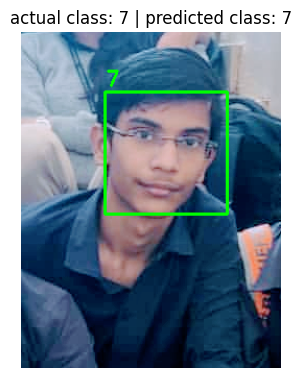

In [279]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[7]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()